# Agenda

- Introduction to Classification Problem

    - Binary vs Multi-Class problems
    
- Introduction to `default` dataset
    
- Logistic Regression
    - Model
    - Cost Function: Maximum Likelihood
    - Solution: Gradient Descent

- Making Predictions by using coefficients

- Assessing the models performance

    - Confusion Matrices
    - Recall
    - Precision

# Classification Problems

- Supervised Learning (Training with already labeled data)


__Examples__

- Object Detection

<img src = "images/object_detection.jpeg" width = 550/>

- Determine an email is spam or not

- Document Classification

- Medical Imaging

<img src = "images/chexnet.png" width = 350 />

[Source](https://stanfordmlgroup.github.io/projects/chexnet/)

- Handwriting Recognition
<img src = "images/mnist.png" width = 450 />

- Qualitative vs Quantitative Data

- Qualitative Data (Categorical)

    - Either Discrete or some sort of description
    
    - Data is not measured but observed: (Spam-Ham, Car-Truck, Default-Not, Pop-Rock-Rap, Malignant-Benign)
    
    - There is no order, rank in data.

__Binary vs Multi-Class problems__
- Determine which one of the problems above are binary or multi-class

__Today's Dataset__

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns 

%matplotlib inline

In [75]:
default= pd.read_excel('../Data/Default.xlsx', index_col= 0)

default.head(2)

## or try

## pd.read_excel("https://github.com/JWarmenhoven/ISLR-python/raw/master/Notebooks/Data/Default.xlsx", index_col=0)

,default,student,balance,income
1,No,No,729.526495,44361.625074
2,No,Yes,817.180407,12106.134700


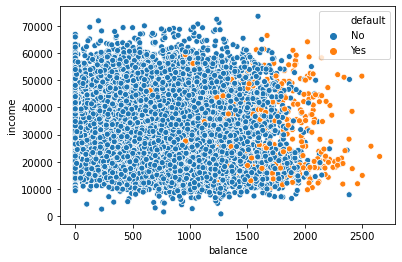

In [76]:
sns.scatterplot(x ="balance", y= "income", data =default, hue= 'default', )
plt.draw()

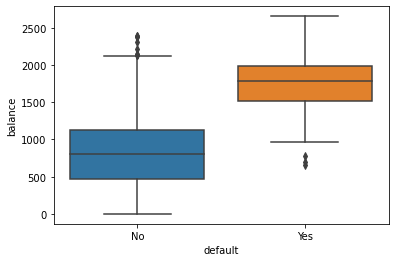

In [77]:
sns.boxplot('default', y= 'balance', data= default)

__Why not Linear Regression?__


-  Suppose we are working with a medical data and $ Y = \lbrace\mbox{'Stroke': 1, 'overdose' : 2, 'seizure': 3}\rbrace$

- Can you see the problem with applying a regression problem to such formulation?

- Discuss this with your group.


<img src = "images/linear_reg.png" width = 550/>

<img src = "images/linear_reg2.png" width =550/>

# Logistic Regression: Model

__Some Notation__

P('default' = Yes | balance) = p('balance') : Probability of `default` for a given `balance` value. 

__More Generally__

P(Y = 1 | X) = p(X) : Probability of `target` is 1 given an `observation`


__Model__


$$ p(X) = \frac{e^{\beta_{0} + \beta_{1}X}}{1 + e^{\beta_{0} + \beta_{1}X}} $$

This function is called logistic function.

__Why such a model?__

- It should be clear that $P(X ) = \beta_{0} + \beta_{1}X$ (linear model) wouldn't work

- We can easily show: 

Odds:
$${p(X)\over 1-p(X)}  = e^{\beta_{0} + \beta_{1}X}$$

Log-odds - Logit
$$\log \left({p(X)\over 1-p(X)}\right) = \beta_0 + \beta_1 X$$

__How to interpret the coefficients?__

- In linear regression $P(X ) = \beta_{0} + \beta_{1}X$:

    - $\beta_1$: Average change in $Y$ when $X$ is increased one-unit
    
- In Log-reg:
$\log \left({p(X)\over 1-p(X)}\right) = \beta_0 + \beta_1 X$

    - $\beta_1$: Average change in Log-odds when $X$ is increased one-unit
    - Equivalently: odds is multiplied by $e^{\beta_1}$
    - Note that the relation between $p(X)$ and $\beta_1$ is not linear though.
    - Vaguely: $\beta_1$ positive means increasing $X$ will lead to increasing $p(X)$

In other words:

- Logistic regression outputs the **probabilities of a specific class**
- Those probabilities can be converted into **class predictions**

The **logistic function** has some nice properties:

- Takes on an "s" shape
- Output is bounded by 0 and 1


# How to estimate the coefficients?

<img src= "images/conditional_prob.png" width = 550 />

<img src = "images/likelihood.png" width =550 />

<img src = "images/Loglikelihood.png" width = 550/>

__Goal:__ Maximize the likelihood! 

- This method is called `Maximum Likelihood Method`. A very common algorithm in ML. 

__Using Sklearn__

In [78]:

X = default[["balance"]]

y = default.default

In [79]:
from sklearn.linear_model import LogisticRegression ## import model


logreg = LogisticRegression(penalty = 'none' ) ## instantiate model

logreg.fit(X,y) ## fit model to data (learning)

beta1 = logreg.coef_ ## check coefs

beta0 = logreg.intercept_ ## check beta0

print(beta0, beta1)

[-10.65132867] [[0.00549892]]


__Making Predictions__

In [80]:
import numpy as np

X = np.array([[1000]])

logreg.predict_proba(X)



array([[0.99424785, 0.00575215]])

# Multiple Logistic Regression

<img src = "images/multiple.png" width = 550 />

__Your Turn__


- With your group try to use all of the features to train a logistic regression model

- Note: `student` column is not ready for such training yet. Make sure that you take care of it first.

# Part-2: Confusion Matrices and Assessing Performance


<img src = "images/confusion.png" width =550 />


In [113]:
import requests
from io import StringIO # for reading inputs

orig_url = "https://drive.google.com/file/d/1HzsqurgcCSNW2I2d2uQDAVKnTfc2iM_c/view?usp=sharing"

file_id = orig_url.split('/')[-2]

dwn_url='https://drive.google.com/uc?export=download&id=' + file_id

url = requests.get(dwn_url).text

csv_raw = StringIO(url)

df = pd.read_csv(csv_raw, index_col= 0)

df.drop(columns= ['Unnamed: 32'], inplace = True)


__Breast Cancer Dataset__

In [114]:
df.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [115]:
#df = pd.read_csv('../Data/breast_cancer.csv', index_col= 0)


In [116]:
df['Target'] = df.diagnosis.map(lambda x: 1 if x == 'M' else 0)

In [117]:
X = df.drop(columns= ['diagnosis', 'Target']) ## creating features (input data)
y = df.Target ## creating target values

logreg = LogisticRegression(penalty = 'none', max_iter= 10000) ## instantiate

logreg.fit(X, y) ## fit

LogisticRegression(max_iter=10000, penalty='none')

In [118]:
## Accuracy Scores
score = logreg.score(X,y)
score

0.9859402460456942

In [119]:
predictions = logreg.predict(X)

In [120]:
from sklearn import metrics

cm = metrics.confusion_matrix(y, predictions)

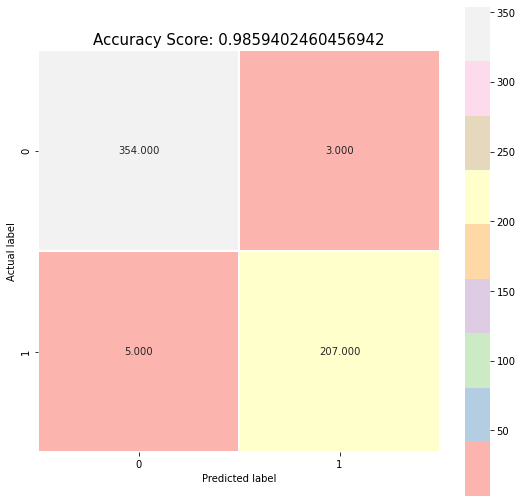

In [111]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
plt.show()

## Accuracy - Recall - Precision

__Accuracy__

$$\text{Accuracy} =  \frac{\text{# of Correct Predictions}}{\text{# of Total Cases}}$$

__Recall__

$$ \text{Recall} = \frac{\text{# True Positives}}{\text{# of Condition Positive}} = \frac{\text{TP}}{\text{TP + FN}} $$

$$ \text{Precision} = \frac{\text{# True Positives}}{\text{# of Predicted Positive}} = \frac{\text{TP}}{\text{TP + FP}} $$

<img src = "images/conf_matrix_classification_metrics.png" width = 750/>

# Extras

Advantages of logistic regression:

- Highly interpretable (if you remember how)
- Model training and prediction are fast
- No tuning is required (excluding regularization)
- Features don't need scaling (if you are not using regularization)
- Can perform well with a small number of observations
- Outputs well-calibrated predicted probabilities

Disadvantages of logistic regression:

- Presumes a linear relationship between the features and the log-odds of the response
- Performance is (generally) not competitive with the best supervised learning methods
- Can't automatically learn feature interactions

<img src='images/logistic_betas.png' width=700/>

# Resources

[Andrew Ng - Logistic Regression - After 45:00 min](https://www.youtube.com/watch?v=het9HFqo1TQ&ab_channel=stanfordonline)

[Logistic Regression with Python](https://www.youtube.com/watch?v=71iXeuKFcQM)

[Handling Categorical Varibles](https://www.bogotobogo.com/python/scikit-learn/scikit_machine_learning_Data_Preprocessing-Missing-Data-Categorical-Data.php)

[pd.dummies vs OHE](https://stackoverflow.com/questions/36631163/what-are-the-pros-and-cons-between-get-dummies-pandas-and-onehotencoder-sciki)

[Solvers - Documentation](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)